### 기본 라이브러리 임포트

In [2]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import folium

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

import dataset_function as ds_f
import folium_function as fl_f
import plot_function as pl_f

In [3]:
# 나의 루트 경로 설정
path_dateset = 'G:/내 드라이브/DataSet/'

---
### 데이터 불러오기(자치구별 - 집계데이터)

In [5]:
start_time = time.time()

# 자전거 이용량 - 연도별 자치구별 출퇴근 자전거 이용량 2018-2024(정비센터 제외).parquet
# 자치구|출퇴근|이용건수|이용거리(M)|이용시간(분)|연도
df_gu_BikeUse = ds_f.get_gu_BikeUse()

# 자전거도로 - 연도별 자치구별 자전거도로 2019-2024(기준연도 +1).parquet
# 연도|자치구|총계 연장(㎞)|총계 노선(개)|전용도로 연장(㎞)|전용도로 노선(개)|전용차로 연장(㎞)|전용차로 노선(개)|우선도로 연장(㎞)|우선도로 노선(개)|겸용도로(분리형) 연장(㎞)|겸용도로(분리형) 노선(개)|겸용도로(비분리형) 연장(㎞)|겸용도로(비분리형) 노선(개)
df_gu_BikeRoad = ds_f.get_gu_BikeRoad()

# 자전거 대여소 수 - 연도별 자치구별 대여소 및 거치대수 2020-2024(기준연도 +1).parquet
# 연도|자치구|대여소|거치대
df_gu_BikeRental = ds_f.get_gu_BikeRental()

# 인구밀도 - 연도별 자치구별 인구밀도 2019-2023.parquet
# 연도|자치구|인구(명)|면적(㎢)|인구밀도(명/㎢)
df_gu_PeopleDensity = ds_f.get_gu_PeopleDensity()

# 출/퇴근 인원 밀집도(유동인구) - 연도별 자치구별 출퇴근 이동인구 2020-2024.parquet
# 연도|출퇴근|자치구|이동인구
df_gu_PeopleMove = ds_f.get_gu_PeopleMove()

# 연도별 자치구별 출퇴근 평균 이동인구 - 연도별 자치구별 출퇴근 평균 이동인구 2020-2024.parquet
# 연도|출퇴근|자치구|이동인구
df_gu_PeopleMove_Mean = ds_f.get_gu_PeopleMove_Mean()
    
# 지하철역 인근여부 - 연도별 자치구별 대여소-지하철역 최단거리 펑균 2021-2024(기준연도 +1).parquet
# 연도|자치구|최단거리
df_gu_NearTrainStatin = ds_f.get_gu_NearTrainStatin()

# 차량통행속도 - 연도별 자치구별 평균 차량통행속도 2020-2024.parquet
# 연도|출퇴근|자치구|평균속도
df_gu_VehiSpeed = ds_f.get_gu_VehiSpeed()

# 유가(기름 가격) - 연도별 자치구별 평균 유가 2021-2024.parquet
# 연도|자치구|고급휘발유|보통휘발유|자동차용경유|실내등유
df_gu_OilPrice = ds_f.get_gu_OilPrice()

print("read_parquet time :", time.time() - start_time)

read_parquet time : 0.10094237327575684


---
## 각 데이터 별, 마지막 년도 데이터 가져오기

In [10]:
df_gu_BikeRoad_2 = df_gu_BikeRoad[df_gu_BikeRoad['연도'] == 2024]
df_gu_BikeRental_2 = df_gu_BikeRental[df_gu_BikeRental['연도'] == 2024]
df_gu_PeopleDensity_2 = df_gu_PeopleDensity[df_gu_PeopleDensity['연도'] == 2023]
df_gu_PeopleMove_2 = df_gu_PeopleMove[df_gu_PeopleMove['연도'] == '2024']
df_gu_NearTrainStatin_2 = df_gu_NearTrainStatin[df_gu_NearTrainStatin['연도'] == 2024]
df_gu_VehiSpeed_2 = df_gu_VehiSpeed[df_gu_VehiSpeed['연도'] == '2024']
df_gu_OilPrice_2 = df_gu_OilPrice[df_gu_OilPrice['연도'] == 2024]

In [12]:
df_gu_BikeRoad_2.head(2)

,연도,자치구,총계 연장(㎞),총계 노선(개),전용도로 연장(㎞),전용도로 노선(개),전용차로 연장(㎞),전용차로 노선(개),우선도로 연장(㎞),우선도로 노선(개),겸용도로(분리형) 연장(㎞),겸용도로(분리형) 노선(개),겸용도로(비분리형) 연장(㎞),겸용도로(비분리형) 노선(개)
125,2024,종로구,32.08,43,4.19,1,6.85,13,10.11,16,0.63,2,10.3,11
126,2024,중구,22.39,21,4.19,1,0.00,0,10.70,14,7.50,6,0.0,0


In [14]:
cond1 = df_gu_PeopleMove['출퇴근'] == '출근'
cond2 = df_gu_PeopleMove['연도'] == '2024'
df_gu_PeopleMove[cond1 & cond2].sort_values(by = '이동인구', ascending = False).head()

,연도,출퇴근,자치구,이동인구
200,2024,출근,강남구,44904151.17
214,2024,출근,서초구,27691565.02
219,2024,출근,영등포구,27080281.21
223,2024,출근,중구,26897204.03
217,2024,출근,송파구,23114998.50


In [26]:
cond1 = df_gu_PeopleMove['출퇴근'] == '출근'
cond2 = df_gu_PeopleMove['연도'] == '2024'
df_temp = df_gu_PeopleMove[cond1 & cond2].sort_values(by = '이동인구', ascending = False)

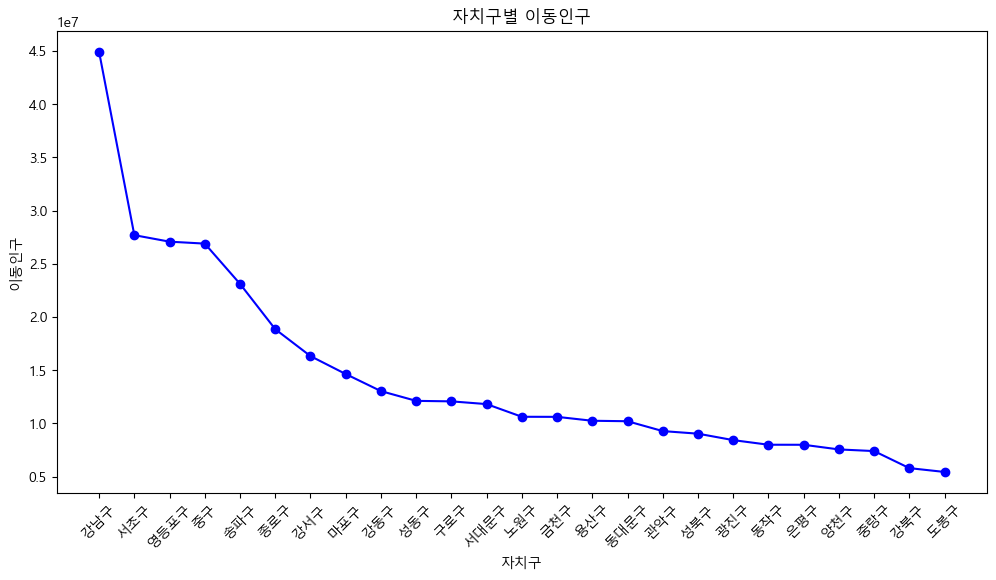

In [28]:
pl_f.plot_single_plot(df_temp, '자치구', '이동인구')

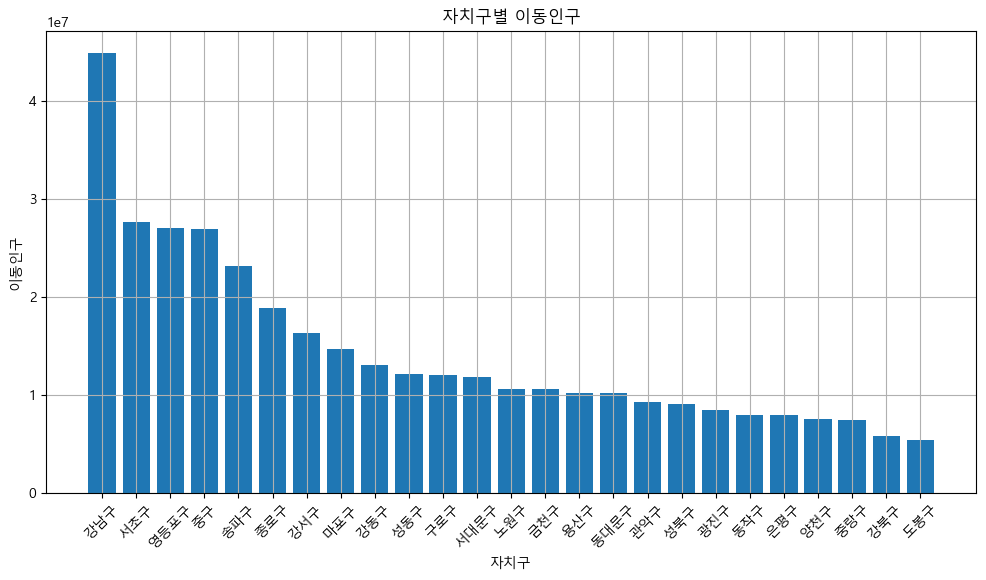

In [18]:
pl_f.plot_single_bar(df_temp, '자치구', '이동인구')

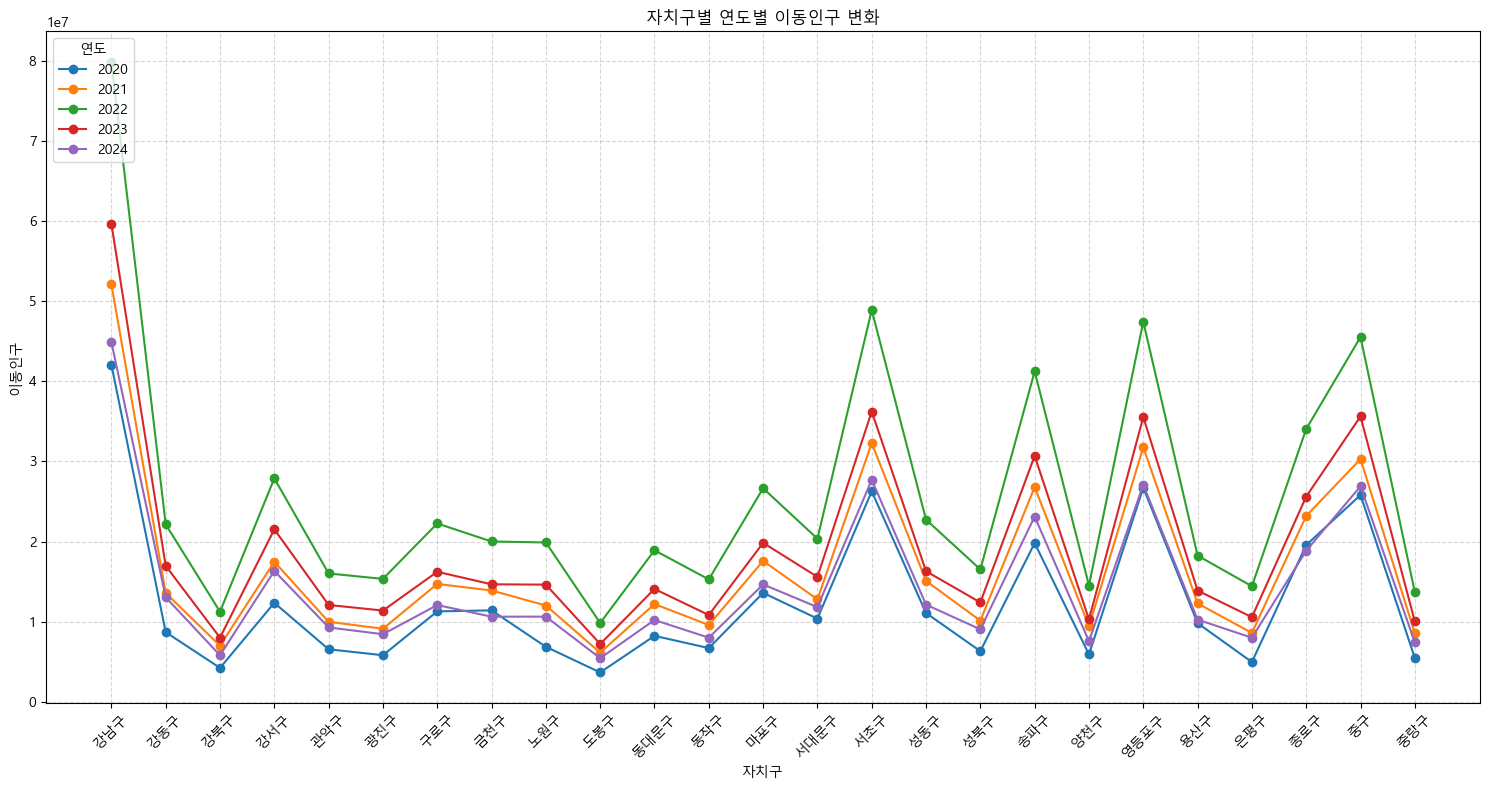

In [20]:
# def plot_groub_multi_plot(_data, _groub1, _groub2, _val):
pl_f.plot_groub_multi_plot(df_gu_PeopleMove[df_gu_PeopleMove['출퇴근'] == '출근'], '연도', '자치구', '이동인구')

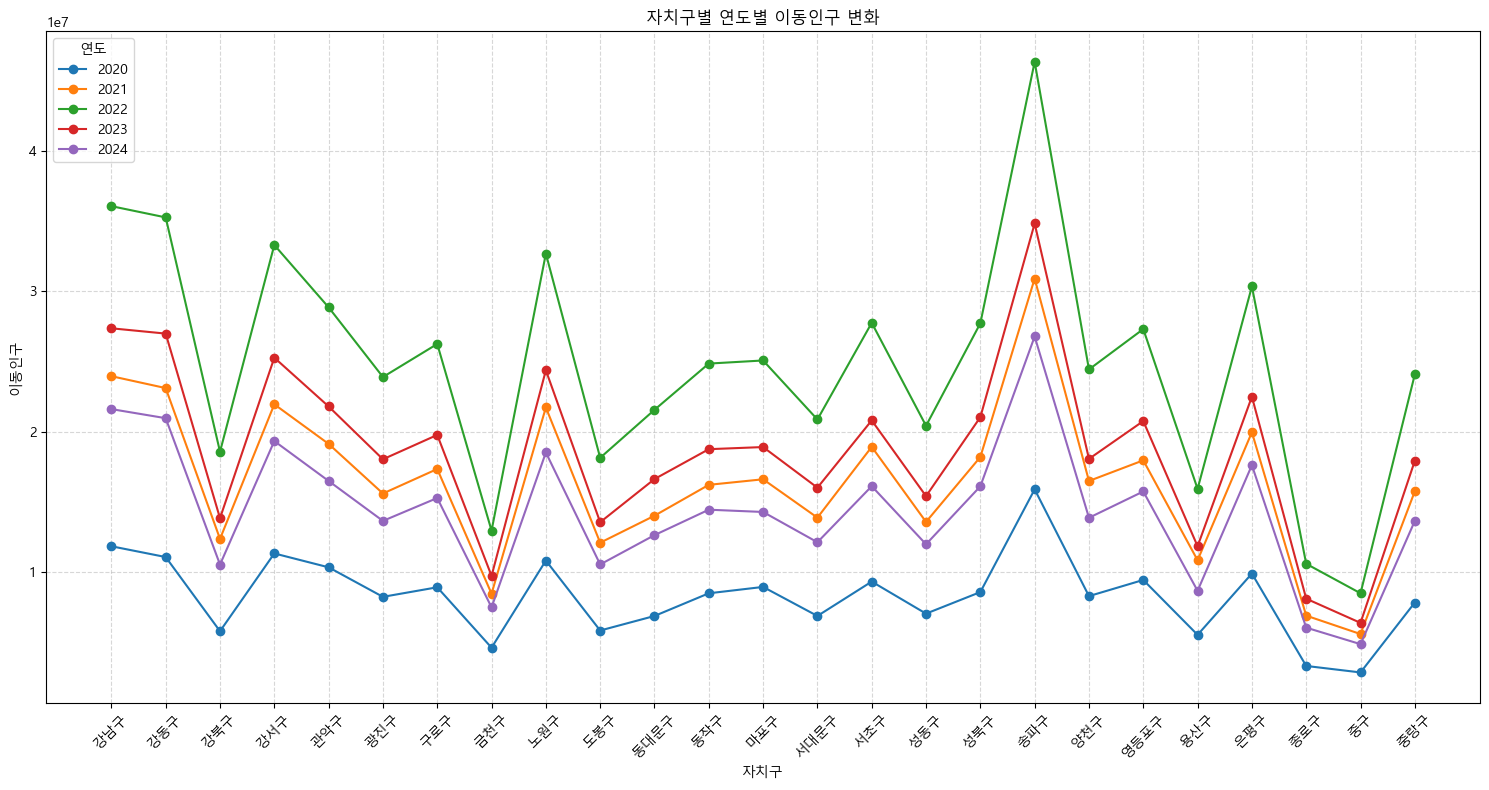

In [22]:
pl_f.plot_groub_multi_plot(df_gu_PeopleMove[df_gu_PeopleMove['출퇴근'] == '퇴근'], '연도', '자치구', '이동인구')